# VGG 16

In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator



from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import VGG16



#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

C:\Users\Asus\anaconda3\envs\venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [3]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [4]:
tr_df = train_df('Training')

In [5]:
tr_df

,Class Path,Class
0,Training\glioma\Tr-glTr_0000.jpg,glioma
1,Training\glioma\Tr-glTr_0001.jpg,glioma
2,Training\glioma\Tr-glTr_0002.jpg,glioma
3,Training\glioma\Tr-glTr_0003.jpg,glioma
4,Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,Training\pituitary\Tr-pi_1455.jpg,pituitary


In [6]:
ts_df = test_df('Testing')

In [7]:
ts_df

,Class Path,Class
0,Testing\glioma\Te-glTr_0000.jpg,glioma
1,Testing\glioma\Te-glTr_0001.jpg,glioma
2,Testing\glioma\Te-glTr_0002.jpg,glioma
3,Testing\glioma\Te-glTr_0003.jpg,glioma
4,Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1305,Testing\pituitary\Te-pi_0295.jpg,pituitary
1306,Testing\pituitary\Te-pi_0296.jpg,pituitary
1307,Testing\pituitary\Te-pi_0297.jpg,pituitary
1308,Testing\pituitary\Te-pi_0298.jpg,pituitary


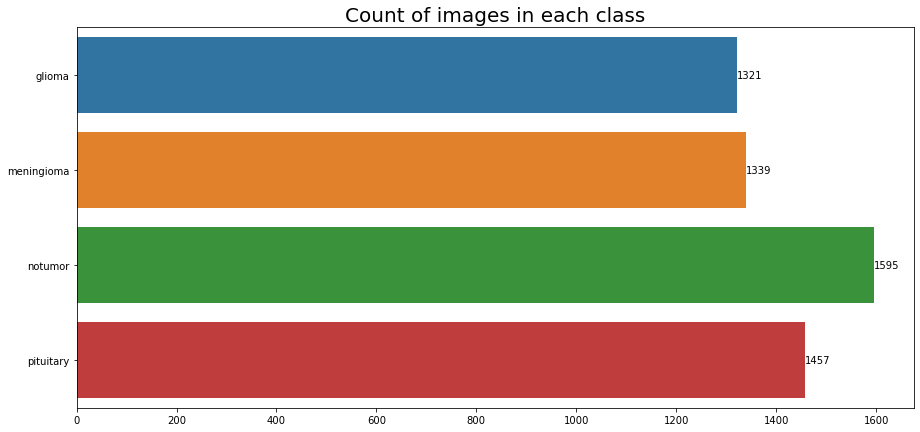

In [8]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

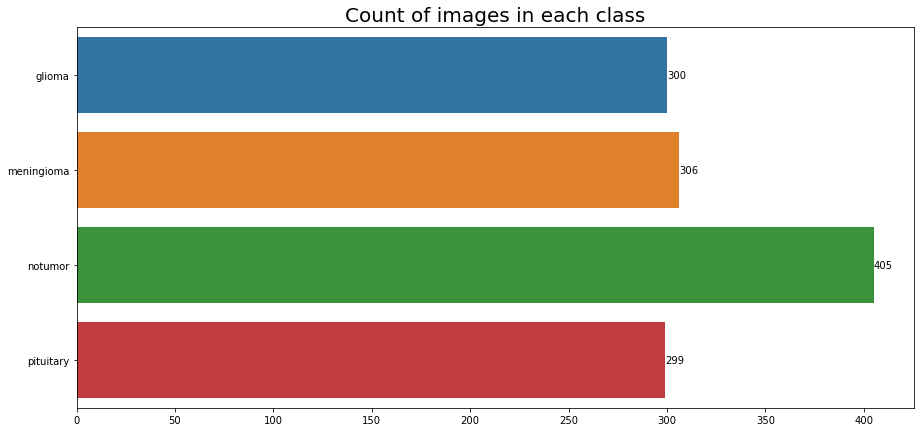

In [9]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
valid_df, ts_df = train_test_split(ts_df, train_size=.5, random_state=20)

In [11]:
valid_df

,Class Path,Class
464,Testing\meningioma\Te-me_0164.jpg,meningioma
987,Testing\notumor\Te-no_0381.jpg,notumor
565,Testing\meningioma\Te-me_0265.jpg,meningioma
503,Testing\meningioma\Te-me_0203.jpg,meningioma
502,Testing\meningioma\Te-me_0202.jpg,meningioma
...,...,...
1242,Testing\pituitary\Te-pi_0232.jpg,pituitary
924,Testing\notumor\Te-no_0318.jpg,notumor
1247,Testing\pituitary\Te-pi_0237.jpg,pituitary
271,Testing\glioma\Te-gl_0271.jpg,glioma


In [12]:
batch_size = 16
img_size = (299,299)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                 target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


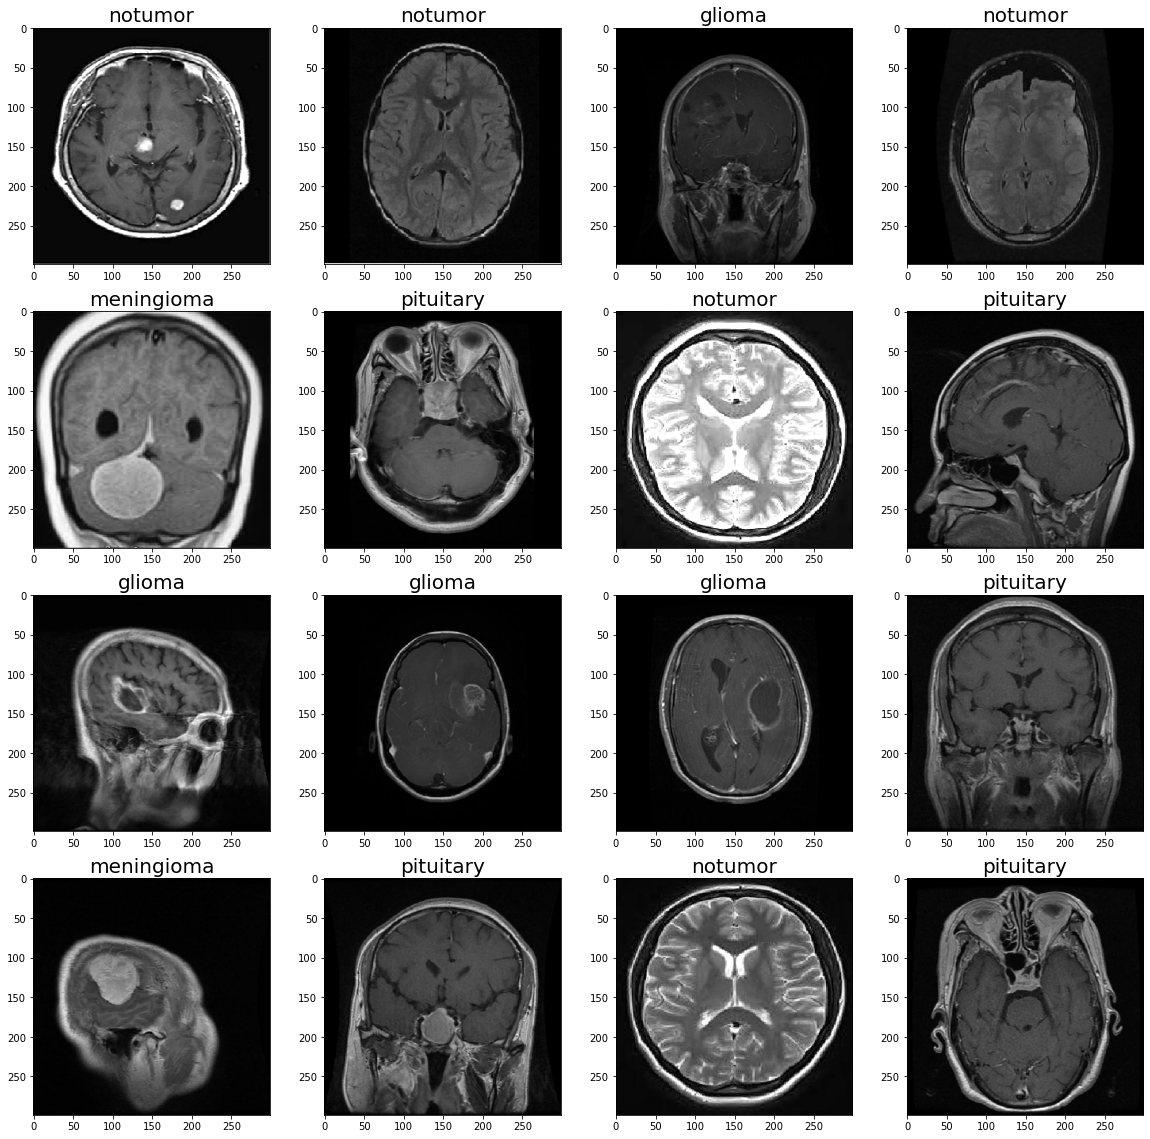

In [13]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

In [14]:
# Set the input shape for VGG16
img_shape = (299, 299, 3)

# Load VGG16 as the base model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=img_shape, pooling='max')

# Uncomment the following lines if you want to freeze the layers
# for layer in base_model.layers:
#     layer.trainable = False

# Build the neural network
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(64, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Display the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 14747780 (56.26 MB)
Trainable params: 14

In [15]:


hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10


357/357 [==============================] - 5942s 17s/step - loss: 1.6133 - accuracy: 0.5264 - precision: 0.6278 - recall: 0.3160 - val_loss: 0.9172 - val_accuracy: 0.6565 - val_precision: 0.7373 - val_recall: 0.5313
Epoch 2/10
357/357 [==============================] - 5158s 14s/step - loss: 0.7616 - accuracy: 0.6866 - precision: 0.7480 - recall: 0.5949 - val_loss: 0.7305 - val_accuracy: 0.7069 - val_precision: 0.7665 - val_recall: 0.5863
Epoch 3/10
357/357 [==============================] - 4985s 14s/step - loss: 0.6509 - accuracy: 0.7493 - precision: 0.7991 - recall: 0.6794 - val_loss: 0.7435 - val_accuracy: 0.7374 - val_precision: 0.7642 - val_recall: 0.6977
Epoch 4/10
357/357 [==============================] - 4997s 14s/step - loss: 0.5358 - accuracy: 0.7955 - precision: 0.8351 - recall: 0.7472 - val_loss: 0.5609 - val_accuracy: 0.7985 - val_precision: 0.8167 - val_recall: 0.7756
Epoch 5/10
357/357 [==============================] - 5822s 16s/step - loss: 0.4623 - accu

In [16]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

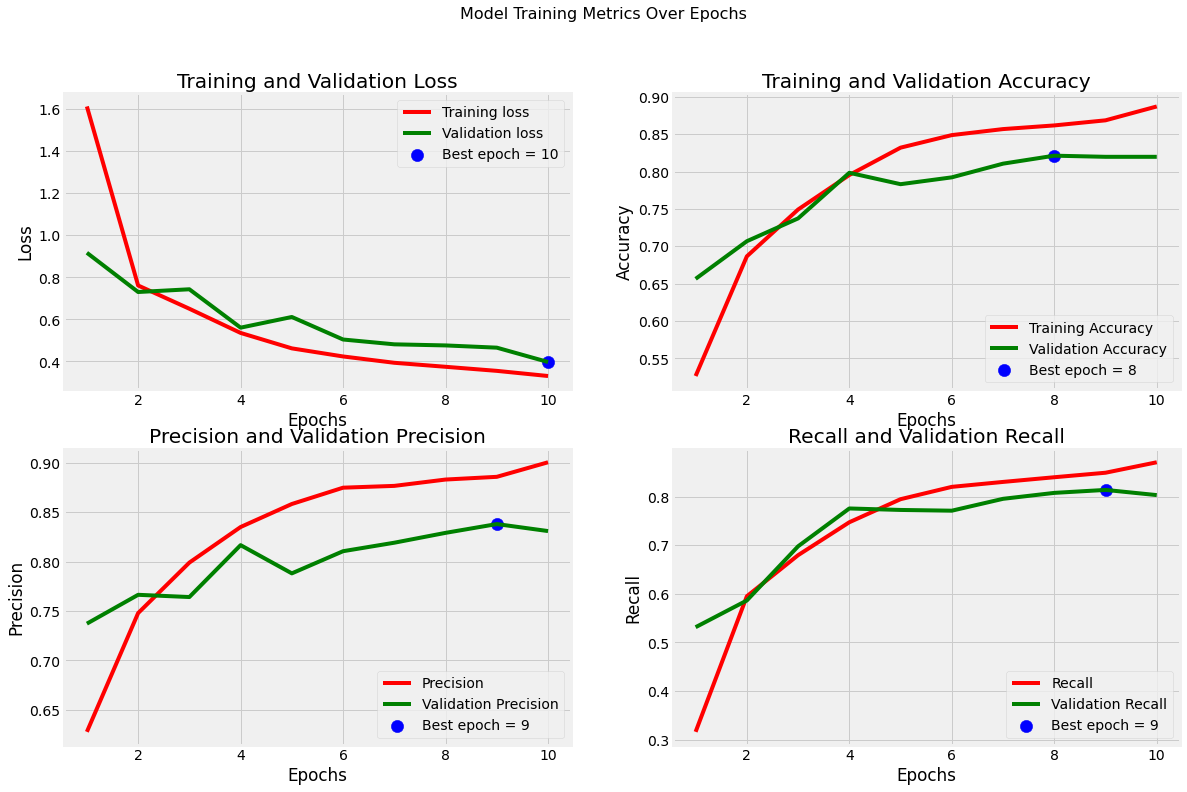

In [17]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [18]:
train_score = model.evaluate(tr_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(ts_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 118s 3s/step - loss: 0.4059 - accuracy: 0.8214 - precision: 0.8365 - recall: 0.8122
Train Loss:  0.27635231614112854
Train Accuracy:  0.8912814855575562
--------------------
Validation Loss:  0.3974692225456238
Validation Accuracy:  0.8198473453521729
--------------------
Test Loss:  0.40587395429611206
Test Accuracy:  0.8213740587234497


In [19]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 112s 3s/step


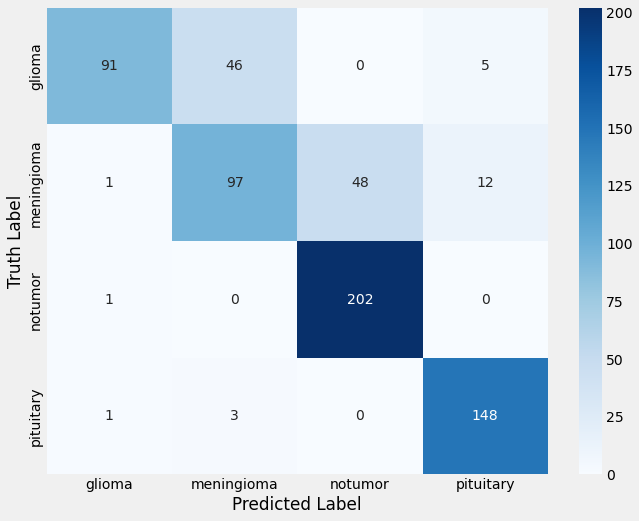

In [20]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [21]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       142
           1       0.66      0.61      0.64       158
           2       0.81      1.00      0.89       203
           3       0.90      0.97      0.93       152

    accuracy                           0.82       655
   macro avg       0.83      0.81      0.81       655
weighted avg       0.83      0.82      0.81       655



In [22]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 [==============================] - 0s 284ms/step


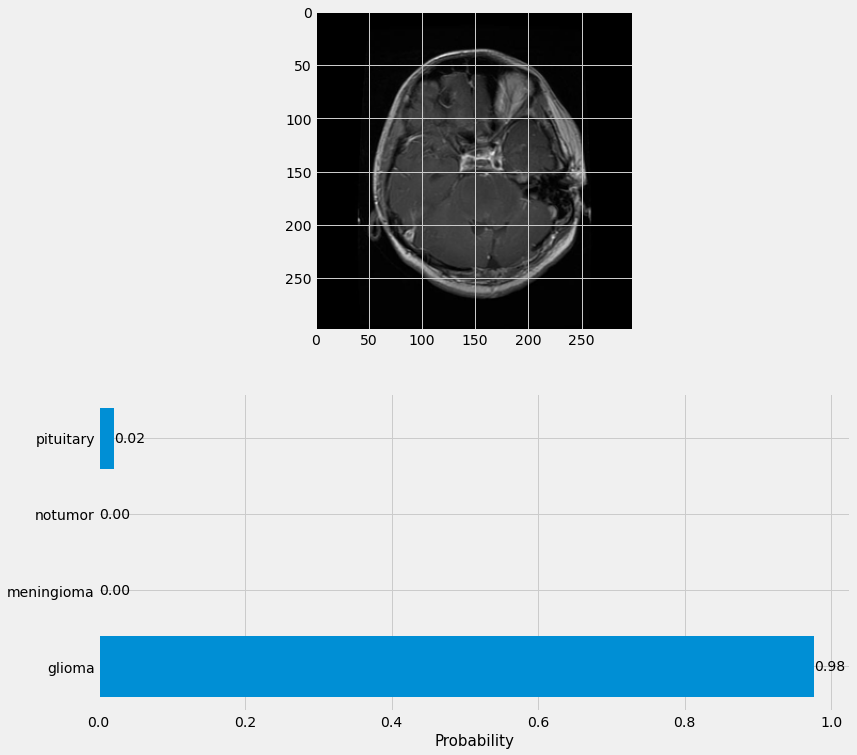

In [23]:
predict('Testing/glioma/Te-gl_0010.jpg')

1/1 [==============================] - 0s 179ms/step


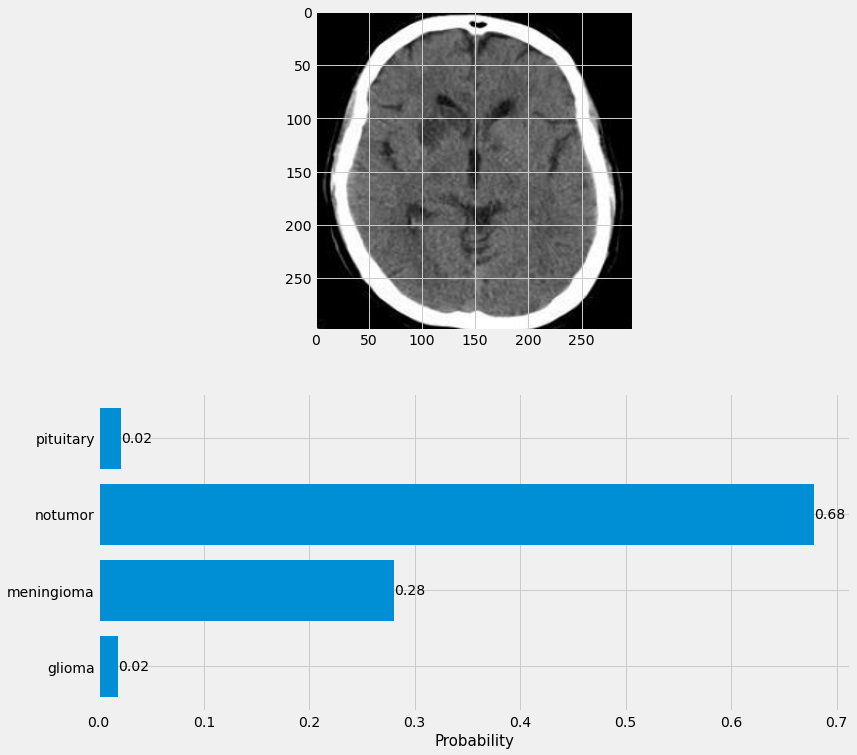

In [24]:
predict('Testing/notumor/Te-no_0010.jpg')

1/1 [==============================] - 0s 169ms/step


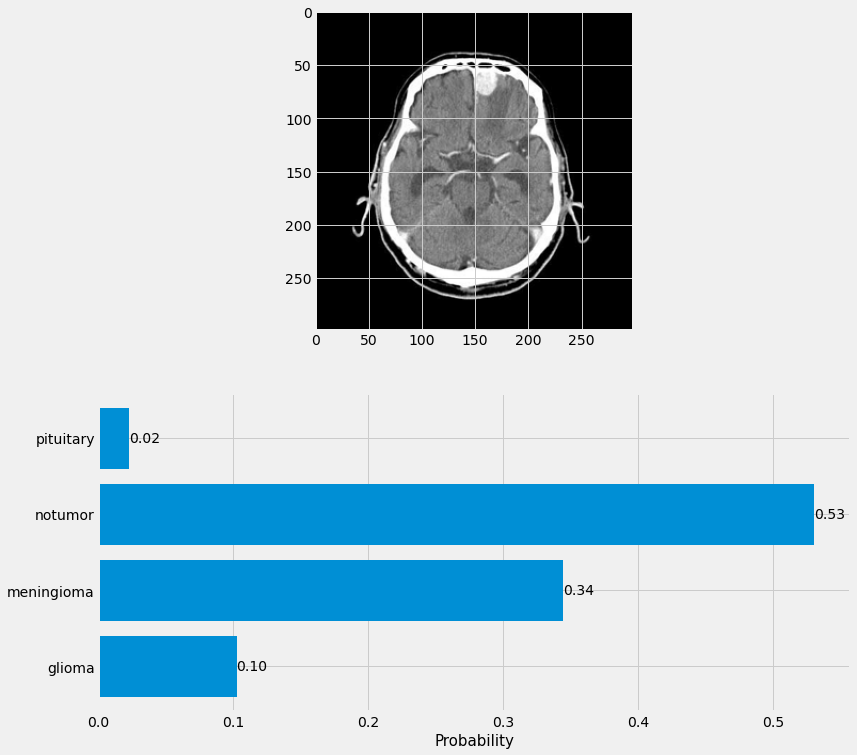

In [25]:
predict('Testing/meningioma/Te-me_0032.jpg')

1/1 [==============================] - 0s 172ms/step


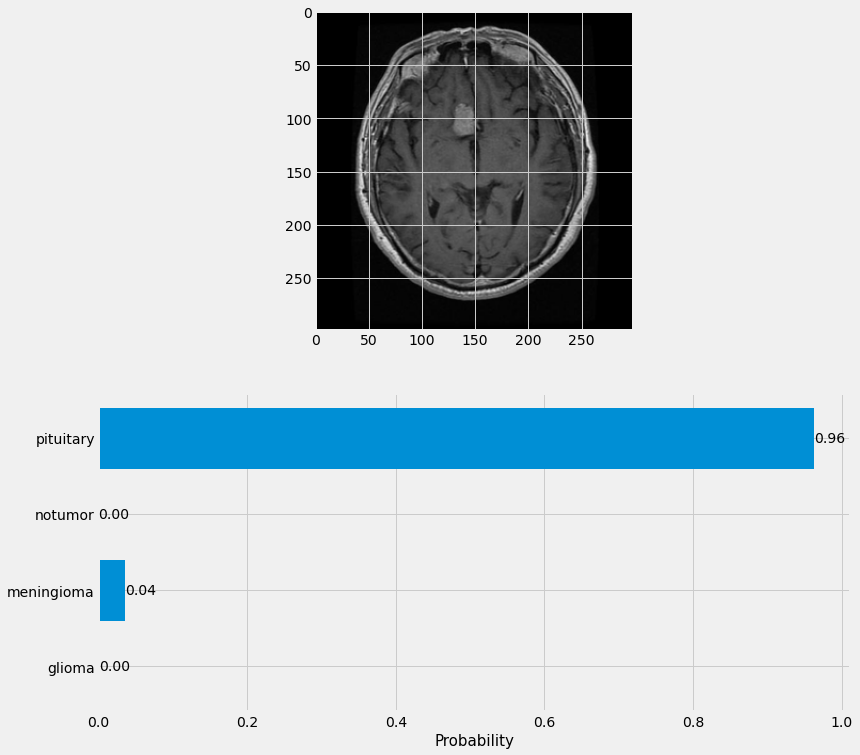

In [26]:
predict('Testing/pituitary/Te-pi_0032.jpg')

1/1 [==============================] - 0s 188ms/step


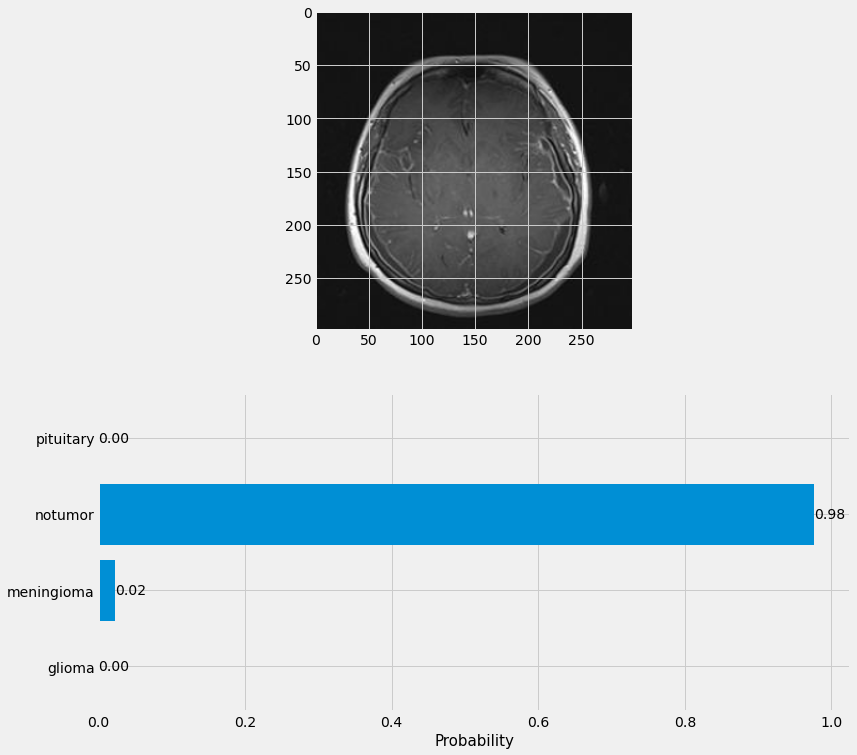

In [27]:
predict('Testing/notumor/Te-no_0045.jpg')

1/1 [==============================] - 0s 173ms/step


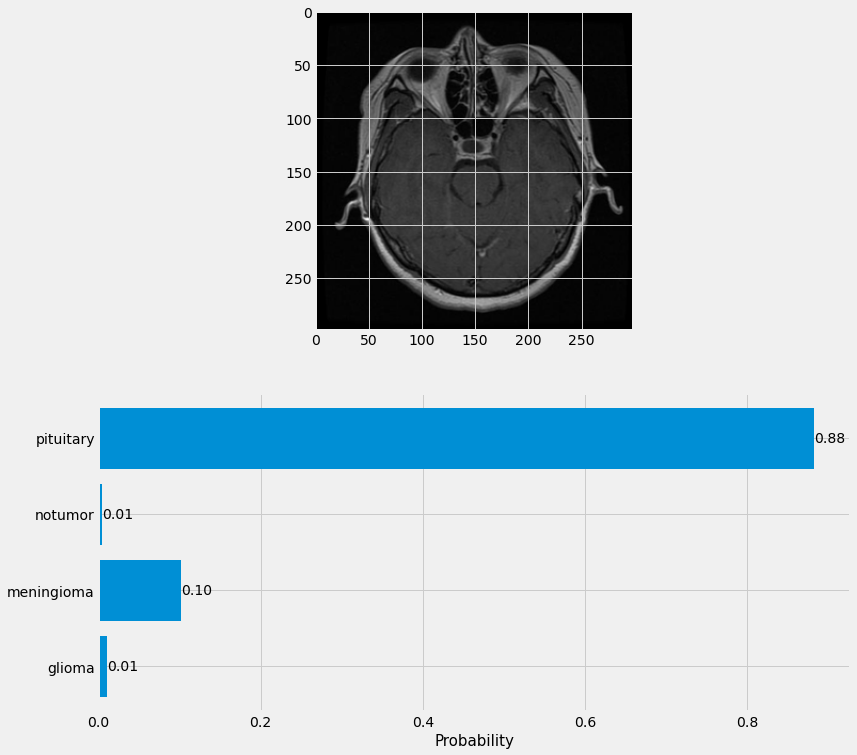

In [28]:
predict('Testing/pituitary/Te-pi_0062.jpg')

### Saving the model

In [29]:
model.save("brain_tumor_model(VGG16).h5")